In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from bio_optics.helper import resampling, utils, owt, indices, plotting

# Input Datasets

In [70]:
# European coastal zones and lakes, extracts, EnMAP
from netCDF4 import Dataset
datasetName='DBFullEnMAP'
d = Dataset(r'Z:\projects\ongoing\EnsAD\workspace\data\Database\EnsAD_DB_V0104_filtered.nc', 'r')

nc_vars = [var for var in d.variables]
print(nc_vars)

print(np.unique(d.variables['Image'][:]))

OWT = np.asarray([str(b) for b in d['OWT'][:]])
nc_vars = [var for var in d.variables]
columns = nc_vars[4:-14]
df = pd.DataFrame()
df['OWT'] = OWT
df['Image'] = d.variables['Image'][:]
print(np.unique(df['OWT']))

pin = [str(a) + '_' + str(b) + '_'+ c.split('_V010')[0].split('_')[-2] for a, b, c in zip(OWT, d['index'][:], d['Image'][:])]
Rrs = np.zeros((len(OWT), len(columns)))
for i, col in enumerate(columns):
    Rrs[:, i] = d[col][:]

pin = np.asarray(pin)

wlStand = np.asarray([float(a) for a in columns])
Rrs_unc = np.zeros(Rrs.shape) + np.nanmax(Rrs) * 0.05

ID = np.array(np.sum(np.isnan(Rrs), axis=1) == 0)
Rrs = Rrs[ID, :]
Rrs_unc = Rrs_unc[ID, :]
pin = pin[ID]
df = df.loc[ID,:]

wavelengths = wlStand
wavelengths = wavelengths[(wavelengths>400) & (wavelengths<750)]

r_rs = pd.DataFrame(Rrs.T[(wlStand>400) & (wlStand<750)].T)

IDvalid = np.array(df['OWT'].values != 'NaN')
r_rs = r_rs.loc[IDvalid,:]
df = df.loc[IDvalid,:]

print(datasetName, r_rs.shape)

['index', 'Image', 'lon', 'lat', '418.24', '423.874', '429.294', '434.528', '439.603', '444.549', '449.391', '454.159', '458.884', '463.584', '468.265', '472.934', '477.599', '482.265', '486.941', '491.633', '496.349', '501.094', '505.87', '510.678', '515.519', '520.397', '525.313', '530.268', '535.265', '540.305', '545.391', '550.525', '555.71', '560.947', '566.239', '571.587', '576.995', '582.464', '587.997', '593.596', '599.267', '605.011', '610.833', '616.737', '622.732', '628.797', '634.919', '641.1', '647.341', '653.643', '660.007', '666.435', '672.927', '679.485', '686.11', '692.804', '699.567', '706.401', '713.307', '720.282', '727.324', '734.431', '741.601', '748.833', '756.124', '763.472', '770.876', '778.333', '785.843', '793.402', '801.01', '808.665', '816.367', '824.112', '831.901', '839.731', '847.601', '855.509', '863.455', '871.433', '879.442', '887.478', '895.537', '902.257', 'OWT', 'Count_0', 'AC', 'Version', 'Season', 'BiomeType', 'OrbitDirection', 'SunElevationAngle

In [39]:
# Baltic Sea extracts, EnMAP
from netCDF4 import Dataset
datasetName='BalticEnMAP'
d = Dataset(r'Z:\projects\ongoing\EnsAD\workspace\data\Database\EnsAD_DB_V0104.nc', 'r')

nc_vars = [var for var in d.variables]
print(nc_vars)

## Baltic Sea
# ID = np.logical_and(np.logical_and(nc_fid.variables['lon'][:] > 12, nc_fid.variables['lon'][:] < 20),
#                     np.logical_and(nc_fid.variables['lat'][:] > 54, nc_fid.variables['lat'][:] < 60))
# print(np.sum(ID))

tileList = ['20230717T102603Z', '20230914T105621Z', '20230925T104142Z', '20230925T104147Z',
            '20230925T104151Z', '20230921T103824Z']
ID1 = np.asarray([tileList[0] in b for b in d.variables['Image'][:]])
for tile in tileList[1:]:
    ID2 = np.asarray([tile in b for b in d.variables['Image'][:]])
    ID1 = np.logical_or(ID1, ID2)

print(ID1)
print(np.unique(d.variables['Image'][:][ID1]))

OWT = np.asarray([str(b) for b in d['OWT'][:]])
df = pd.DataFrame()
df['OWT'] = OWT
print(np.unique(df['OWT']))
nc_vars = [var for var in d.variables]
columns = nc_vars[4:-14]

pin = [str(a) + '_' + str(b) + '_'+ c.split('_V010')[0].split('_')[-2] for a, b, c in zip(OWT, d['index'][:], d['Image'][:])]
Rrs = np.zeros((len(OWT), len(columns)))
for i, col in enumerate(columns):
    Rrs[:, i] = d[col][:]

Rrs = Rrs[ID1,:]
pin = np.asarray(pin)
pin = pin[ID1]
df = df.loc[ID1,:]

wlStand = np.asarray([float(a) for a in columns])
Rrs_unc = np.zeros(Rrs.shape) + np.nanmax(Rrs) * 0.05

ID = np.array(np.sum(np.isnan(Rrs), axis=1) == 0)
Rrs = Rrs[ID, :]
Rrs_unc = Rrs_unc[ID, :]
pin = pin[ID]
df = df.loc[ID,:]

wavelengths = wlStand
wavelengths = wavelengths[(wavelengths>400) & (wavelengths<750)]

r_rs = pd.DataFrame(Rrs.T[(wlStand>400) & (wlStand<750)].T)

IDvalid = np.array(df['OWT'].values != 'NaN')
r_rs = r_rs.loc[IDvalid,:]
df = df.loc[IDvalid,:]

['index', 'Image', 'lon', 'lat', '418.24', '423.874', '429.294', '434.528', '439.603', '444.549', '449.391', '454.159', '458.884', '463.584', '468.265', '472.934', '477.599', '482.265', '486.941', '491.633', '496.349', '501.094', '505.87', '510.678', '515.519', '520.397', '525.313', '530.268', '535.265', '540.305', '545.391', '550.525', '555.71', '560.947', '566.239', '571.587', '576.995', '582.464', '587.997', '593.596', '599.267', '605.011', '610.833', '616.737', '622.732', '628.797', '634.919', '641.1', '647.341', '653.643', '660.007', '666.435', '672.927', '679.485', '686.11', '692.804', '699.567', '706.401', '713.307', '720.282', '727.324', '734.431', '741.601', '748.833', '756.124', '763.472', '770.876', '778.333', '785.843', '793.402', '801.01', '808.665', '816.367', '824.112', '831.901', '839.731', '847.601', '855.509', '863.455', '871.433', '879.442', '887.478', '895.537', '902.257', 'OWT', 'Count_0', 'AC', 'Version', 'Season', 'BiomeType', 'OrbitDirection', 'SunElevationAngle

In [21]:
## North Sea extracts, EnMAP
datasetName='NorthSeaEnMAPSouth20230815'
df = pd.read_csv(r'Z:\projects\ongoing\EnsAD\workspace\data\Database\\20230815_DB\\20230815_South.csv')
print(df.columns.values)
a = [str(b) for b in df['OWT'].values]
df['OWT']=np.asarray(a)
print(np.unique(df['OWT']))
IDvalid = np.array(df['OWT'].values != 'nan')

wavelengths = df.columns[4:84].values.astype(float)
wavelengths = wavelengths[(wavelengths>400) & (wavelengths<750)]
r_rs =  df.iloc[:,4:len(wavelengths)+4]
r_rs = r_rs.loc[IDvalid,:]
df = df.loc[IDvalid,:]

['index' 'Image' 'lon' 'lat' '418.24' '423.874' '429.294' '434.528'
 '439.603' '444.549' '449.391' '454.159' '458.884' '463.584' '468.265'
 '472.934' '477.599' '482.265' '486.941' '491.633' '496.349' '501.094'
 '505.87' '510.678' '515.519' '520.397' '525.313' '530.268' '535.265'
 '540.305' '545.391' '550.525' '555.71' '560.947' '566.239' '571.587'
 '576.995' '582.464' '587.997' '593.596' '599.267' '605.011' '610.833'
 '616.737' '622.732' '628.797' '634.919' '641.1' '647.341' '653.643'
 '660.007' '666.435' '672.927' '679.485' '686.11' '692.804' '699.567'
 '706.401' '713.307' '720.282' '727.324' '734.431' '741.601' '748.833'
 '756.124' '763.472' '770.876' '778.333' '785.843' '793.402' '801.01'
 '808.665' '816.367' '824.112' '831.901' '839.731' '847.601' '855.509'
 '863.455' '871.433' '879.442' '887.478' '895.537' '902.257' 'OWT'
 'Count_0' 'AC' 'Version' 'Season' 'BiomeType' 'OrbitDirection'
 'SunElevationAngle' 'SunAzimuthAngle' 'AcrossOffNadirRange'
 'AlongOffNadirRange' 'SceneAzimuthA

# Inversion results

In [22]:
path = r"E:\Documents\projects\EnsAD\inversion\HZG_HEREON_groups\results_MK\\"

datasetNameList = ['BalticEnMAP', 'DBFullEnMAP', 'NorthSeaEnMAPSouth20230815']
colorList = ['lightcoral', 'chocolate', 'goldenrod', 'darkkhaki', 'yellowgreen', 'cadetblue', 'orchid', 'slateblue', 'hotpink']

IOPResultDict = {}
IOPResultDict[datasetName] = {}
IOPResultDict[datasetName]['fname'] = "inverted_IOP_bio_optics_HEREONfull_"+datasetName+"_V7AHall_md_bd_v2.txt"
IOPResultDict[datasetName]['fname_rrs'] = "inverted_Rrs_bio_optics_HEREONfull_"+datasetName+"_V7AHall_md_bd_v2.txt"

for i, dn in enumerate(datasetNameList):
    if dn == datasetName:
        IOPResultDict[datasetName]['col'] = colorList[i]


dDict = {}
for key in IOPResultDict.keys():
    d = pd.read_csv(path + IOPResultDict[key]['fname'], sep='\t', header=0)
    dDict[key] = d.loc[IDvalid,:]
    print(dDict[key].shape)

rrsDict = {}
for key in IOPResultDict.keys():
    d = pd.read_csv(path + IOPResultDict[key]['fname_rrs'], sep='\t', header=0)
    rrsDict[key] = d.loc[IDvalid,:]
    print(rrsDict[key].shape, rrsDict[key].columns.values)

(1276, 83)
(1276, 60) ['418.24' '423.874' '429.294' '434.528' '439.603' '444.549' '449.391'
 '454.159' '458.884' '463.584' '468.265' '472.934' '477.599' '482.265'
 '486.941' '491.633' '496.349' '501.094' '505.87' '510.678' '515.519'
 '520.397' '525.313' '530.268' '535.265' '540.305' '545.391' '550.525'
 '555.71' '560.947' '566.239' '571.587' '576.995' '582.464' '587.997'
 '593.596' '599.267' '605.011' '610.833' '616.737' '622.732' '628.797'
 '634.919' '641.1' '647.341' '653.643' '660.007' '666.435' '672.927'
 '679.485' '686.11' '692.804' '699.567' '706.401' '713.307' '720.282'
 '727.324' '734.431' '741.601' '748.833']


In [23]:
# Error, Residuals of spectral fit
SpectralErrorDict={}

for key in IOPResultDict.keys():
    rMAE = np.zeros(r_rs.shape[0])
    sam = np.zeros(r_rs.shape[0])
    
    for i in range(len(rMAE)):
        rMAE[i] = np.mean(utils.compute_residual(r_rs.iloc[i].values, rrsDict[key].iloc[i,:].values, method=11))
        sam[i] = np.sum(r_rs.iloc[i].values * rrsDict[key].iloc[i,:].values)/\
                     (np.sqrt(np.sum(r_rs.iloc[i].values*r_rs.iloc[i].values)) * np.sqrt(np.sum(rrsDict[key].iloc[i,:].values*rrsDict[key].iloc[i,:].values)))
        sam[i] = np.arccos(sam[i])
        
    sam *=180./np.pi
    SpectralErrorDict[key] = {}
    SpectralErrorDict[key]['rMAE'] = rMAE
    SpectralErrorDict[key]['SAM'] = sam

    # dsurf = pd.read_csv(path + RrsResultDict[key]['glint_fname'], header=0, sep='\t')
    # glintStrength = np.mean(dsurf/r_rs, axis=1)
    # SpectralErrorDict[key]['glint'] = glintStrength
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.16505238323072363


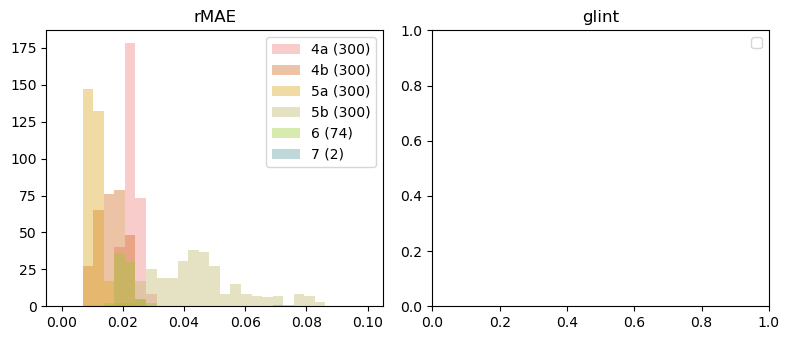

In [24]:
## histogram rMAE and glint strength
Nx = 2
bins = np.linspace(0.00, 0.1, 30) # North Sea: 0.06, Baltic: 0.27, FullDB (not Baltic): 0.2 
colorList = ['lightcoral', 'chocolate', 'goldenrod', 'darkkhaki', 'yellowgreen', 'cadetblue', 'orchid', 'slateblue', 'hotpink']
fig, ax = plt.subplots(nrows=1, ncols=Nx, figsize=(8,3.5))
owtList = np.unique(df['OWT'])
print(np.max(SpectralErrorDict[datasetName]['rMAE']))
for i, owt in enumerate(owtList):
    ID = np.array(df['OWT'].values == owt)
    ax[0].hist(SpectralErrorDict[datasetName]['rMAE'][ID], bins=bins, color=colorList[i], alpha=0.4, label=owt + " ("+ str(int(np.sum(ID)))+")")
    # ax[1].hist(SpectralErrorDict[key]['glint'],  color=RrsResultDict[key]['col'], alpha=0.4, label=key)

ax[0].set_title('rMAE')
ax[1].set_title('glint')
for i in range(Nx):
    ax[i].legend()

fig.tight_layout()
plt.show()

## Analyse phytoplankton types (variable)

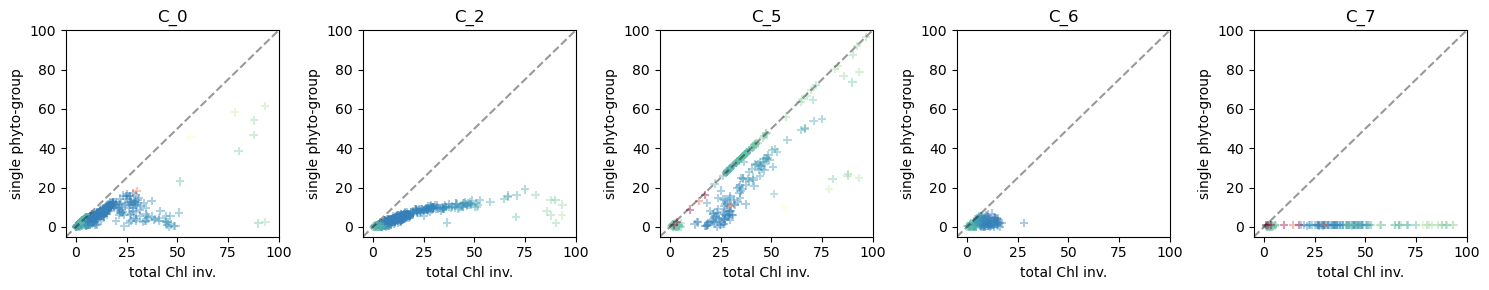

In [25]:
ChlTypeList =  ['C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7']
chltypeList = []
for ct in ChlTypeList:
    if len(np.unique(dDict[datasetName][ct])) > 1:
        chltypeList.append(ct)

colorMap = plt.cm.get_cmap('Spectral_r')
Nx = len(chltypeList)
Ny = 1

vmax = 0.1 # Baltic: 0.27, North Sea: 0.06

fig, ax = plt.subplots(nrows=Ny, ncols=Nx, figsize=(len(chltypeList)*3, 3))
# for ix, key in enumerate(SpectralErrorDict.keys()):
#     ax[0, ix].scatter(df['CDOM'], dDict[key]['C_Y'], marker='+', c=SpectralErrorDict[key]['rMAE'], cmap=colorMap, vmin=0.00115, vmax=vmax, alpha=0.4)
#     ax[0, ix].set_xlabel('CDOM insitu')
#     ax[0, ix].set_ylabel('C_Y')
#     ax[0, ix].set_title(key)

# for ix, key in enumerate(SpectralErrorDict.keys()):
#     ax[1, ix].scatter(df['Turbidity'], dDict[key]['C_ism'], marker='+', c=SpectralErrorDict[key]['rMAE'], cmap=colorMap, vmin=0.00115, vmax=vmax, alpha=0.4)
#     ax[1, ix].set_xlabel('Turbidity insitu')
#     ax[1, ix].set_ylabel('C_ism')


for ix, chl in enumerate(chltypeList):
    ID = np.logical_and(np.array(dDict[datasetName]['C_phy'] > 0.1), np.array(dDict[datasetName][chl] > 0.1))
    ax[ix].scatter(dDict[datasetName]['C_phy'][ID], dDict[datasetName][chl][ID], marker='+', c=SpectralErrorDict[datasetName]['rMAE'][ID], cmap=colorMap, vmin=0.00115, vmax=vmax, alpha=0.4)
    ax[ix].set_xlabel('total Chl inv.')
    ax[ix].set_ylabel('single phyto-group')
    ax[ix].set_title(chl)
    xlim = (-5, 100.)
    ax[ix].plot(xlim, xlim, 'k--', alpha=0.4)
    ax[ix].set_xlim(xlim)
    ax[ix].set_ylim(xlim)
    

fig.tight_layout()
plt.show()

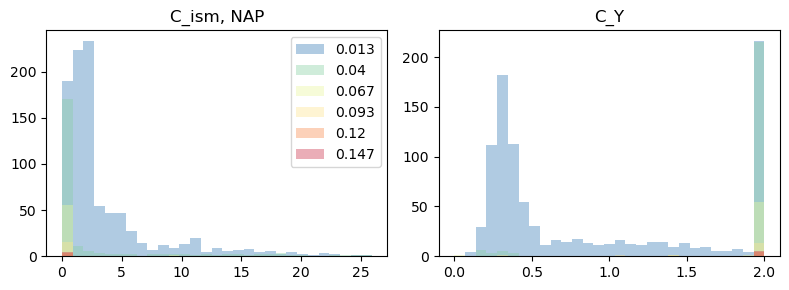

In [26]:
## histogram of NAP and CDOM clustered by goodness of spectral fit
rMAEmax = 0.16 # NorthSea: 0.1, BalticSea: 0.27, Full DB: 0.2
errorBin = np.linspace(0.00, rMAEmax, 7) # rMAE
if 'Baltic' in datasetName:
    bins_NAP = np.linspace(0., 10., 30) # Baltic
elif 'Full' in datasetName:
    bins_NAP = np.linspace(0., 30., 30) # Full DB
else:
    bins_NAP = np.linspace(0., np.max(dDict[datasetName]['C_ism']), 30)
bins_Y = np.linspace(0., np.max(dDict[datasetName]['C_Y']), 30)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
for i in range(len(errorBin)-1):
    ID = np.logical_and(np.array(SpectralErrorDict[datasetName]['rMAE']>errorBin[i]), np.array(SpectralErrorDict[datasetName]['rMAE']<errorBin[i+1]))
    center = np.mean(errorBin[i:(i+2)])
    ax[0].hist(dDict[datasetName]['C_ism'][ID], bins= bins_NAP, color=colorMap(center/rMAEmax), alpha=0.4, label=np.round(center, 3))
    ax[1].hist(dDict[datasetName]['C_Y'][ID], bins= bins_Y, color=colorMap(center/rMAEmax), alpha=0.4)

ax[0].set_title('C_ism, NAP')
ax[0].legend()
ax[1].set_title('C_Y')
fig.tight_layout()
plt.show()

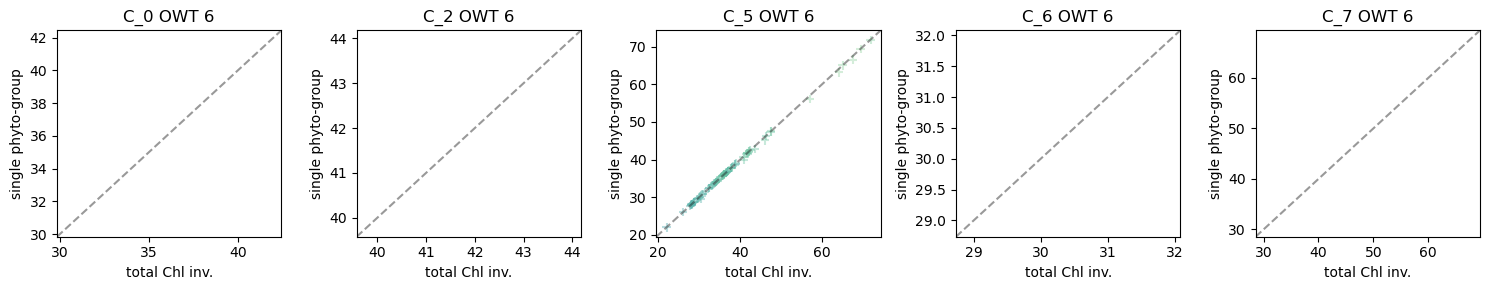

In [19]:
## by OWT
ChlTypeList =  ['C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7']
chltypeList = []
for ct in ChlTypeList:
    if len(np.unique(dDict[datasetName][ct])) > 1:
        chltypeList.append(ct)

colorMap = plt.cm.get_cmap('Spectral_r')
Nx = len(chltypeList)
Ny = 1

vmax = 0.1 #Baltic 0.27, North Sea 0.06

owtList = ['2', '3a', '3b', '4a', '4b', '5a', '5b', '6', '7'] 
owt = '6'

fig, ax = plt.subplots(nrows=Ny, ncols=Nx, figsize=(len(chltypeList)*3, 3))
for ix, chl in enumerate(chltypeList):
    ID = np.logical_and(np.logical_and(np.array(dDict[datasetName]['C_phy'] > 0.1), np.array(dDict[datasetName][chl] > 0.1)), 
                        np.array(df['OWT'].values==owt))
    ax[ix].scatter(dDict[datasetName]['C_phy'][ID], dDict[datasetName][chl][ID], marker='+', c=SpectralErrorDict[datasetName]['rMAE'][ID], cmap=colorMap, vmin=0.00115, vmax=vmax, alpha=0.4)
    ax[ix].set_xlabel('total Chl inv.')
    ax[ix].set_ylabel('single phyto-group')
    ax[ix].set_title(chl + " OWT " + owt)
    xlim = ax[ix].get_xlim()
    # xlim = (-10., 250)  # 4a: 60, 4b: 100, 5a: 400, 5b: 1500, 7: 400
    ax[ix].plot(xlim, xlim, 'k--', alpha=0.4)
    ax[ix].set_xlim(xlim)
    ax[ix].set_ylim(xlim)
    

fig.tight_layout()
plt.show()

# Select invertible EnMAP spectra
datasetNameList = ['BalticEnMAP', 'DBFullEnMAP', 'NorthSeaEnMAPSouth20230815']
## North Sea subset

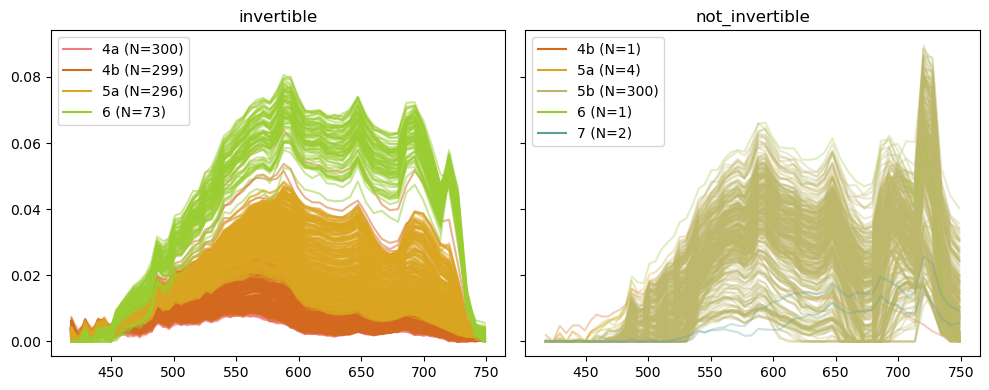

In [27]:
# datasetName = 'NorthSeaEnMAPSouth20230815'
ID = np.logical_and(np.array(dDict[datasetName]['C_phy'] > 0.1), np.array(dDict[datasetName]['C_phy'] < 70.))
ID = np.logical_and(ID, np.array(SpectralErrorDict[datasetName]['rMAE']< 0.05))

colorList = ['lightcoral', 'chocolate', 'goldenrod', 'darkkhaki', 'yellowgreen', 'cadetblue', 'orchid', 'slateblue', 'hotpink']
allOWTs = np.unique(df['OWT'].values)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)
inv_rrs = r_rs.loc[ID,:].values
inv_owt = df['OWT'].values[ID]
for col, owt in zip(colorList, allOWTs):
    ID2 = np.array(inv_owt == owt)
    if np.sum(ID2)>0:
        for i in range(np.sum(ID2)):
            if i==0:
                ax[0].plot(wavelengths, inv_rrs[ID2,:][i, :], '-', color=col, alpha=0.5, label=owt + " (N=" + str(int(np.sum(ID2))) + ')')
            else:
                ax[0].plot(wavelengths, inv_rrs[ID2,:][i, :], '-', color=col, alpha=0.5)
ax[0].set_title('invertible')
legend = ax[0].legend()
handles = legend.legendHandles
for i, handle in enumerate(handles):
    handle.set_alpha(1)

inv_rrs = r_rs.loc[np.logical_not(ID),:].values
inv_owt = df['OWT'].values[np.logical_not(ID)]
for col, owt in zip(colorList, allOWTs):
    ID2 = np.array(inv_owt == owt)
    if np.sum(ID2)>0:
        for i in range(np.sum(ID2)):
            if i==0:
                ax[1].plot(wavelengths, inv_rrs[ID2,:][i, :], '-', color=col, alpha=0.3, label=owt + " (N=" + str(int(np.sum(ID2))) + ')')
            else:
                ax[1].plot(wavelengths, inv_rrs[ID2,:][i, :], '-', color=col, alpha=0.3)

ax[1].set_title('not_invertible')
legend = ax[1].legend()
handles = legend.legendHandles
for i, handle in enumerate(handles):
    handle.set_alpha(1)
fig.tight_layout()
plt.show()

outpath = "E:\Documents\projects\EnsAD\data\EnMAP_NN_training\AANN_NorthSea\\"
invertible = np.zeros(df.shape[0])
invertible[ID] = 1
out = df.copy()
out['invertible'] = invertible
out.to_csv(outpath + "trainingData_EnMAPSpectra_"+ datasetName +"_InvertibleCategory_selection20240405_v2.txt", sep='\t', header=True, index=False)



# out = df.loc[ID,:]
# out.to_csv(outpath + "trainingData_InvertibleEnMAPSpectra_"+ datasetName +"_selection20240405.txt", sep='\t', header=True, index=False)
# out2 = pd.DataFrame()
# out2['selection'] = ID
# out2.to_csv(outpath + "trainingDataIndex_InvertibleEnMAPSpectra_"+ datasetName +"_selection20240405.txt", sep='\t', header=True, index=False)
# print(out.shape)

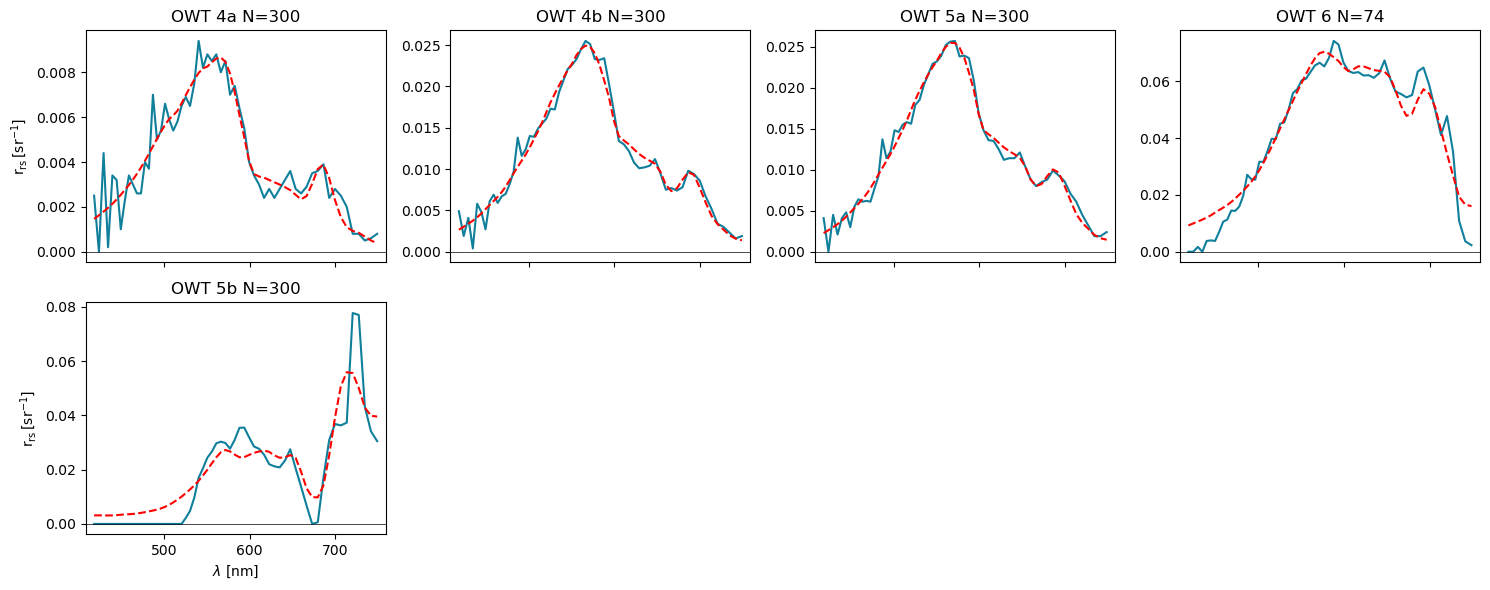

In [30]:
# Example spectrum per OWT
OWT_inv = ['4a', '4b', '5a', '6']
OWT_non = ['5b']
Nx = 4
Ny = 2

rrs_inverted = rrsDict[datasetName]

fig, ax = plt.subplots(nrows=Ny, ncols=Nx, figsize=(15,6), sharex=True)
ix, iy = (0,0)
for owt in OWT_inv:
    ID = np.array(df['OWT'].values == owt)
    ax[iy, ix].plot(wavelengths, r_rs.loc[ID,:].values[0,:], c='#0f7f9b', label="measured")
    ax[iy, ix].plot(wavelengths, rrs_inverted.loc[ID,:].values[0,:], '--', c='red', label='modeled')

    if iy == Ny-1:
        ax[iy, ix].set_xlabel('$\lambda$ [nm]')
    if ix==0:
        ax[iy, ix].set_ylabel('$\mathrm{r_{rs}} \/ [\mathrm{sr}^{-1}]$')
    ax[iy, ix].hlines(0,300,1000, color='black', linewidth=0.5) #, linestyle='dotted')
    ax[iy, ix].set_xlim(np.min(wavelengths)-10,np.max(wavelengths)+10)
    # plt.ticklabel_format(style='scientific')
    # ax[iy, ix].legend()
    ax[iy, ix].set_title('OWT '+ owt + " N="+ str(int(np.sum(ID))))
    ix +=1
    if ix==Nx:
        ix=0
        iy+=1
for owt in OWT_non:
    ID = np.array(df['OWT'].values == owt)
    ax[iy, ix].plot(wavelengths, r_rs.loc[ID,:].values[0,:], c='#0f7f9b', label="measured")
    ax[iy, ix].plot(wavelengths, rrs_inverted.loc[ID,:].values[0,:], '--', c='red', label='modeled')

    if iy == Ny-1:
        ax[iy, ix].set_xlabel('$\lambda$ [nm]')
    if ix==0:
        ax[iy, ix].set_ylabel('$\mathrm{r_{rs}} \/ [\mathrm{sr}^{-1}]$')
    ax[iy, ix].hlines(0,300,1000, color='black', linewidth=0.5) #, linestyle='dotted')
    ax[iy, ix].set_xlim(np.min(wavelengths)-10,np.max(wavelengths)+10)
    # plt.ticklabel_format(style='scientific')
    # ax[iy, ix].legend()
    ax[iy, ix].set_title('OWT '+ owt + " N="+ str(int(np.sum(ID))))
    ix +=1
    if ix==Nx:
        ix=0
        iy+=1

while iy <Ny:
    ax[iy, ix].axis('off')
    ix +=1
    if ix==Nx:
        ix=0
        iy+=1

fig.tight_layout()
plt.show()

## Baltic Sea subset

In [ ]:
# datasetName = 'BalticEnMAP'
## todo !!
# ID = np.logical_and(np.array(dDict[datasetName]['C_phy'] > 0.1), np.array(dDict[datasetName]['C_phy'] < 70.))
# ID = np.logical_and(ID, np.array(SpectralErrorDict[datasetName]['rMAE']< 0.05))

outpath = "E:\Documents\projects\EnsAD\data\EnMAP_NN_training\AANN_BalticSea\\"
out = df.loc[ID,:]
out.to_csv(outpath + "trainingData_InvertibleEnMAPSpectra_"+ datasetName +"_selection20240405.txt", sep='\t', header=True, index=False)
print(out.shape)

## Full DB subset